In [1]:
# null in power
# plotting with multiple features
# efficiency

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
df = pd.read_csv("Train2.csv")
df2=pd.read_csv("Test.csv")

In [4]:
df =df.dropna()
df2=df2.dropna()
df=df.reset_index()
df2=df2.reset_index()
df.shape
fuel=[]
transmition=[]
owner=[]
for i in range(df.shape[0]):
    if( df['Fuel_Type'][i]=="Petrol"):
        fuel.append(0)
    else:
        fuel.append(1)
    if( df['Transmission'][i]=="Manual"):
        transmition.append(0)
    else:
        transmition.append(1)
    if( df['Owner_Type'][i]=="First"):
        owner.append(1)
    elif  df['Owner_Type'][i]=="Second":
        owner.append(2)
    elif  df['Owner_Type'][i]=="Third":
        owner.append(3)
    else:
         owner.append(4)
    
df['Fuel']=fuel
df['Transmition']=transmition
df["Owner_Number"]=owner

In [5]:
df['Location'].nunique()

11

In [6]:
df.head()

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel,Transmition,Owner_Number
0,0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,16500,Petrol,Manual,First,23.84 kmpl,1199 CC,84 bhp,5.0,5.00,0,0,1
1,1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,47357,Diesel,Automatic,First,18.49 kmpl,1493 CC,100 bhp,7.0,8.37,1,1,1
2,2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,35000,Petrol,Manual,First,15.0 kmpl,1598 CC,103.52 bhp,5.0,4.50,0,0,1
3,3,3,Tata Indica V2 DLS BSII,Jaipur,2007,200000,Diesel,Manual,Second,17.2 kmpl,1396 CC,53.5 bhp,5.0,0.85,1,0,2
4,4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,64000,Diesel,Manual,Second,21.02 kmpl,1248 CC,88.76 bhp,5.0,2.65,1,0,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3717 non-null   int64  
 1   Unnamed: 0         3717 non-null   int64  
 2   Name               3717 non-null   object 
 3   Location           3717 non-null   object 
 4   Year               3717 non-null   int64  
 5   Kilometers_Driven  3717 non-null   int64  
 6   Fuel_Type          3717 non-null   object 
 7   Transmission       3717 non-null   object 
 8   Owner_Type         3717 non-null   object 
 9   Mileage            3717 non-null   object 
 10  Engine             3717 non-null   object 
 11  Power              3717 non-null   object 
 12  Seats              3717 non-null   float64
 13  Price              3717 non-null   float64
 14  Fuel               3717 non-null   int64  
 15  Transmition        3717 non-null   int64  
 16  Owner_Number       3717 

In [37]:
df['Engine'] = [int( x.replace(' CC', '')) for x in df['Engine']]
df['Mileage'] = [float( z.replace(' kmpl', '')) for z in df['Mileage']]
df2['Engine'] = [int( x.replace(' CC', '')) for x in df2['Engine']]
df2['Mileage'] = [float( z.replace(' kmpl', '')) for z in df2['Mileage']]
#df['Power'] = [float( x.replace(' bhp', '')) for x in df['Power']]
age=2025-df['Year']
df['Age_Of_Car']=age


AttributeError: 'float' object has no attribute 'replace'

## Feature Scaling

In [9]:
#feature scaling
kilometers_Driven=np.array(df['Kilometers_Driven'])
df['Kilometers_Driven']=(kilometers_Driven-kilometers_Driven.mean())/(kilometers_Driven[kilometers_Driven.argmax()]-kilometers_Driven[kilometers_Driven.argmin()])

mileage=np.array(df['Mileage'])
df['Mileage']=(mileage-mileage.mean())/(mileage[mileage.argmax()]-mileage[mileage.argmin()])

engine=np.array(df['Engine'])
df['Engine']=(engine-engine.mean())/(engine[engine.argmax()]-engine[engine.argmin()])

Seats=np.array(df['Seats'])
df['Seats']=(Seats-Seats.mean())/(Seats[Seats.argmax()]-Seats[Seats.argmin()])

Seats=np.array(df['Age_Of_Car'])
df['Age_Of_Car']=(Seats-Seats.mean())/(Seats[Seats.argmax()]-Seats[Seats.argmin()])

In [10]:
df

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel,Transmition,Owner_Number,Age_Of_Car
0,0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,-0.053646,Petrol,Manual,First,0.202273,-0.087490,84 bhp,-0.034739,5.00,0,0,1,-0.174065
1,1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,-0.013779,Diesel,Automatic,First,0.013892,-0.026708,100 bhp,0.215261,8.37,1,1,1,-0.174065
2,2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,-0.029744,Petrol,Manual,First,-0.108995,-0.005001,103.52 bhp,-0.034739,4.50,0,0,1,-0.031208
3,3,3,Tata Indica V2 DLS BSII,Jaipur,2007,0.183434,Diesel,Manual,Second,-0.031530,-0.046762,53.5 bhp,-0.034739,0.85,1,0,2,0.302125
4,4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,0.007723,Diesel,Manual,Second,0.102977,-0.077360,88.76 bhp,-0.034739,2.65,1,0,2,0.016411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,3745,3745,BMW X5 3.0d,Chennai,2009,0.118835,Diesel,Automatic,First,-0.249840,0.283401,235 bhp,-0.034739,18.75,1,1,1,0.206887
3713,3746,3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,0.034855,Diesel,Automatic,First,-0.222023,0.115115,120 bhp,0.215261,6.25,1,1,1,0.064030
3714,3747,3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,-0.003775,Petrol,Manual,First,0.028329,-0.129045,67.1 bhp,-0.034739,1.45,0,0,1,0.302125
3715,3748,3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,0.025165,Diesel,Manual,First,0.082907,-0.033324,83.8 bhp,-0.034739,6.60,1,0,1,-0.031208


In [11]:
df['Location'].nunique()

11

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3717 entries, 0 to 3716
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3717 non-null   int64  
 1   Unnamed: 0         3717 non-null   int64  
 2   Name               3717 non-null   object 
 3   Location           3717 non-null   object 
 4   Year               3717 non-null   int64  
 5   Kilometers_Driven  3717 non-null   float64
 6   Fuel_Type          3717 non-null   object 
 7   Transmission       3717 non-null   object 
 8   Owner_Type         3717 non-null   object 
 9   Mileage            3717 non-null   float64
 10  Engine             3717 non-null   float64
 11  Power              3717 non-null   object 
 12  Seats              3717 non-null   float64
 13  Price              3717 non-null   float64
 14  Fuel               3717 non-null   int64  
 15  Transmition        3717 non-null   int64  
 16  Owner_Number       3717 

In [13]:
engine=df['Engine'].values
mileage=df['Mileage'].values
seats=df['Seats'].values
kilometer=df['Kilometers_Driven'].values

x_train=df[['Kilometers_Driven','Mileage','Engine','Seats','Age_Of_Car','Fuel','Transmition','Owner_Number']].values
y_train=df["Price"]
#x_train= np.array([[1, 2, 3], [2, 3, 4], [3, 4, 5], [4, 5, 6]])
#y_train = np.array([1, 2, 3, 4])
#x_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
#y_train = np.array([460, 232, 178])


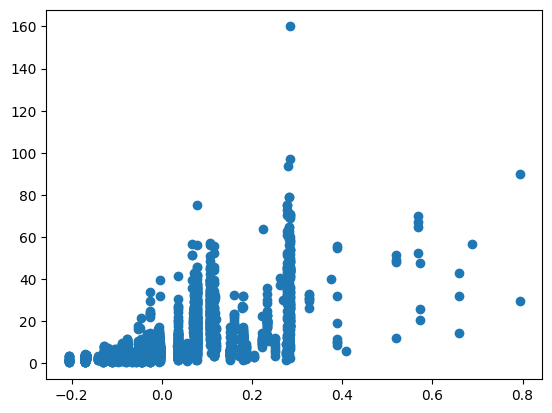

In [14]:
plt.scatter(engine,y_train)
plt.show()

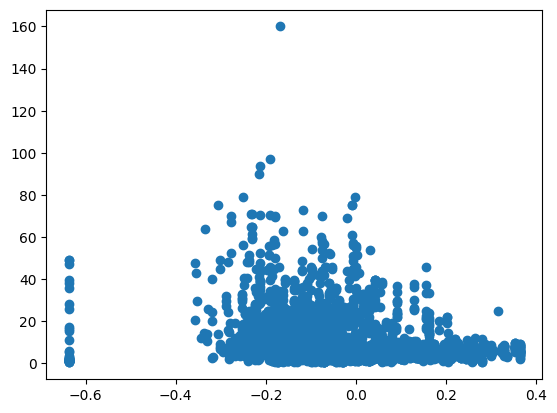

In [15]:
plt.scatter(mileage,y_train)
plt.show()

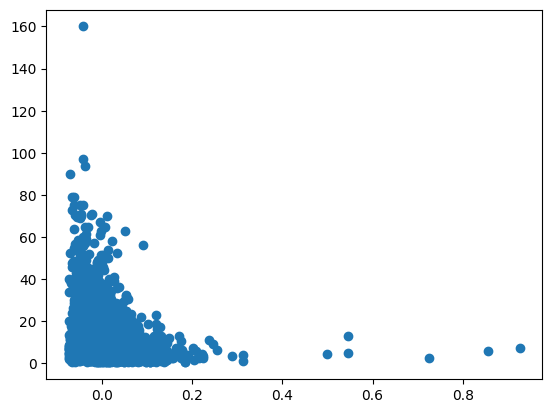

In [16]:
plt.scatter(kilometer,y_train)
plt.show()

In [17]:
x_train,y_train

(array([[-0.0536461 ,  0.20227277, -0.08748983, ...,  0.        ,
          0.        ,  1.        ],
        [-0.01377917,  0.01389249, -0.02670836, ...,  1.        ,
          1.        ,  1.        ],
        [-0.02974429, -0.10899484, -0.00500069, ...,  0.        ,
          0.        ,  1.        ],
        ...,
        [-0.0037753 ,  0.02832911, -0.12904452, ...,  0.        ,
          0.        ,  1.        ],
        [ 0.02516527,  0.08290657, -0.03332403, ...,  1.        ,
          0.        ,  1.        ],
        [-0.02328434,  0.02832911, -0.12904452, ...,  0.        ,
          0.        ,  1.        ]]),
 0        5.00
 1        8.37
 2        4.50
 3        0.85
 4        2.65
         ...  
 3712    18.75
 3713     6.25
 3714     1.45
 3715     6.60
 3716     2.35
 Name: Price, Length: 3717, dtype: float64)

In [18]:
df

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel,Transmition,Owner_Number,Age_Of_Car
0,0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,-0.053646,Petrol,Manual,First,0.202273,-0.087490,84 bhp,-0.034739,5.00,0,0,1,-0.174065
1,1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,-0.013779,Diesel,Automatic,First,0.013892,-0.026708,100 bhp,0.215261,8.37,1,1,1,-0.174065
2,2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,-0.029744,Petrol,Manual,First,-0.108995,-0.005001,103.52 bhp,-0.034739,4.50,0,0,1,-0.031208
3,3,3,Tata Indica V2 DLS BSII,Jaipur,2007,0.183434,Diesel,Manual,Second,-0.031530,-0.046762,53.5 bhp,-0.034739,0.85,1,0,2,0.302125
4,4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,0.007723,Diesel,Manual,Second,0.102977,-0.077360,88.76 bhp,-0.034739,2.65,1,0,2,0.016411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,3745,3745,BMW X5 3.0d,Chennai,2009,0.118835,Diesel,Automatic,First,-0.249840,0.283401,235 bhp,-0.034739,18.75,1,1,1,0.206887
3713,3746,3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,0.034855,Diesel,Automatic,First,-0.222023,0.115115,120 bhp,0.215261,6.25,1,1,1,0.064030
3714,3747,3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,-0.003775,Petrol,Manual,First,0.028329,-0.129045,67.1 bhp,-0.034739,1.45,0,0,1,0.302125
3715,3748,3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,0.025165,Diesel,Manual,First,0.082907,-0.033324,83.8 bhp,-0.034739,6.60,1,0,1,-0.031208


In [19]:
x_train
y_train
m=x_train.shape[0]
n=x_train.shape[1]
w_i=np.zeros(n)
b_i=0
j=[]
print(x_train.shape,y_train.shape)
print(m,n)

(3717, 8) (3717,)
3717 8


## Functions for Linear Regression

In [20]:
def predict(x, w, b): 
    p = np.dot(x, w) + b     
    return p    

In [21]:
def compute_cost(x,y,w,b):
    
    cost=0.0
    sq=0.0
    for i in range(m):
        sq=sq+((np.dot(x[i], w) + b)-y[i])**2
    cost = sq/2/m
    return cost


In [22]:
def compute_gradient(x,y,w,b):
    
    m=x_train.shape[0]
    n=x_train.shape[1]
    #print(len(y),m)
    dj_dw = np.zeros(n)
    dj_db = 0.
    #print(type(dj_dw[0]))
    sum_w=0
    sum_b=0
    for i in range(n):                             
        for j in range(m):
            dj_dw[i]=dj_dw[i]+( np.dot(x[j],w)+b - y[j])*x[j][i]
    for i in range(m):
        dj_db=dj_db+(np.dot(x[i],w)+b-y[i])
    dj_dw = dj_dw / m                                
    dj_db = dj_db / m                                
    #print(dj_db, dj_dw)
    return dj_dw, dj_db
#compute_gradient(x_train,y_train,10,10)
                               
        

In [23]:
 def cal_grad(x,y,w_i,b_i,alpha,iterations):
    
    for i in range(iterations):
        dj_dw,dj_db= compute_gradient(x,y,w_i,b_i)
        #print(dj_dw,dj_db)
        w_i=w_i-alpha*dj_dw
        b_i=b_i-alpha*dj_db
        cost= compute_cost(x,y,w_i,b_i)
        j.append(cost)
        print(cost)
    return w_i,b_i

In [24]:
iterations = 200
ite=np.arange(iterations)
alpha = 0.4
w_final, b_final = cal_grad(x_train, y_train, w_i, b_i,alpha, iterations)


57.79438567235164
52.55122024911968
49.36963038223996
46.78335092169421
44.64805994280641
42.87925602220196
41.409403743480055
40.18370809787081
39.15765076768892
38.295031890491394
37.56639031224909
36.947727747848425
36.419477757097454
35.965672049615094
35.57326592291901
35.23159209826188
34.93191821149632
34.667088031776196
34.43123035182415
34.219522606228615
34.027998778280526
33.85339317101957
33.693013240605254
33.544635996956224
33.406423529701065
33.2768540665312
33.154665655941585
33.038810119089746
32.92841536188022
32.82275449903787
32.72122053351847
32.62330557050256
32.528583736166475
32.4366971261168
32.34734423376353
32.260270410626205
32.17525999314784
32.092129797676016
32.010723739825096
31.930908378816937
31.852569223556085
31.775607666656967
31.699938436687532
31.62548747852473
31.552190187757606
31.479989938210437
31.40883685239579
31.33868677352624
31.269500404939464
31.20124258872381
31.13388170021881
31.06738913907313
31.00173890085846
30.936907215956406
30.87

In [25]:
len(j)

200

## Learning Curve

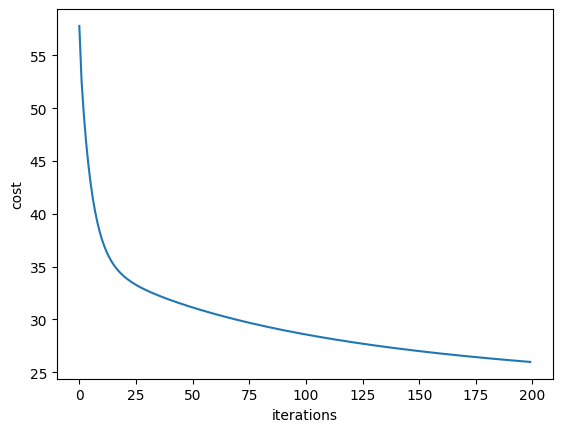

In [26]:
plt.plot(ite,j)
plt.xlabel('iterations')
plt.ylabel('cost')
plt.show()


In [27]:
w_final,b_final

(array([ -5.18305358, -10.12905659,  20.03896295,  -3.76947422,
        -16.57051689,   4.01850263,   9.45068725,  -0.95327581]),
 np.float64(5.792358563207926))

In [28]:
age=2025-df2['Year']
df2['Age_Of_Car']=age
fuel=[]
transmition=[]
owner=[]
for i in range(df2.shape[0]):
    if( df2['Fuel_Type'][i]=="Petrol"):
        fuel.append(0)
    else:
        fuel.append(1)
    if( df2['Transmission'][i]=="Manual"):
        transmition.append(0)
    else:
        transmition.append(1)
    if( df2['Owner_Type'][i]=="First"):
        owner.append(1)
    elif  df2['Owner_Type'][i]=="Second":
        owner.append(2)
    elif  df2['Owner_Type'][i]=="Third":
        owner.append(3)
    else:
        owner.append(4)
    
df2['Fuel']=fuel
df2['Transmition']=transmition
df2["Owner_Number"]=owner

In [29]:
#feature scaling
kilometers_Driven=np.array(df2['Kilometers_Driven'])
df2['Kilometers_Driven']=(kilometers_Driven-kilometers_Driven.mean())/(kilometers_Driven[kilometers_Driven.argmax()]-kilometers_Driven[kilometers_Driven.argmin()])

mileage=np.array(df2['Mileage'])
df2['Mileage']=(mileage-mileage.mean())/(mileage[mileage.argmax()]-mileage[mileage.argmin()])

engine=np.array(df2['Engine'])
df2['Engine']=(engine-engine.mean())/(engine[engine.argmax()]-engine[engine.argmin()])

Seats=np.array(df2['Seats'])
df2['Seats']=(Seats-Seats.mean())/(Seats[Seats.argmax()]-Seats[Seats.argmin()])

Seats=np.array(df2['Age_Of_Car'])
df2['Age_Of_Car']=(Seats-Seats.mean())/(Seats[Seats.argmax()]-Seats[Seats.argmin()])

In [30]:
df

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Fuel,Transmition,Owner_Number,Age_Of_Car
0,0,0,Tata Tiago 1.2 Revotron XZ WO Alloy,Hyderabad,2017,-0.053646,Petrol,Manual,First,0.202273,-0.087490,84 bhp,-0.034739,5.00,0,0,1,-0.174065
1,1,1,Mahindra TUV 300 2015-2019 mHAWK100 T8 AMT,Kochi,2017,-0.013779,Diesel,Automatic,First,0.013892,-0.026708,100 bhp,0.215261,8.37,1,1,1,-0.174065
2,2,2,Skoda Rapid 2013-2016 1.6 MPI Ambition,Mumbai,2014,-0.029744,Petrol,Manual,First,-0.108995,-0.005001,103.52 bhp,-0.034739,4.50,0,0,1,-0.031208
3,3,3,Tata Indica V2 DLS BSII,Jaipur,2007,0.183434,Diesel,Manual,Second,-0.031530,-0.046762,53.5 bhp,-0.034739,0.85,1,0,2,0.302125
4,4,4,Tata Manza Club Class Quadrajet90 LX,Mumbai,2013,0.007723,Diesel,Manual,Second,0.102977,-0.077360,88.76 bhp,-0.034739,2.65,1,0,2,0.016411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3712,3745,3745,BMW X5 3.0d,Chennai,2009,0.118835,Diesel,Automatic,First,-0.249840,0.283401,235 bhp,-0.034739,18.75,1,1,1,0.206887
3713,3746,3746,Mahindra Scorpio 2009-2014 VLX 4WD AT 7S BSIV,Delhi,2012,0.034855,Diesel,Automatic,First,-0.222023,0.115115,120 bhp,0.215261,6.25,1,1,1,0.064030
3714,3747,3747,Maruti Wagon R LXI BSII,Ahmedabad,2007,-0.003775,Petrol,Manual,First,0.028329,-0.129045,67.1 bhp,-0.034739,1.45,0,0,1,0.302125
3715,3748,3748,Renault Duster 85PS Diesel RxL,Hyderabad,2014,0.025165,Diesel,Manual,First,0.082907,-0.033324,83.8 bhp,-0.034739,6.60,1,0,1,-0.031208


In [31]:
x_test=df2[['Kilometers_Driven','Mileage','Engine','Seats',"Age_Of_Car",'Fuel','Transmition','Owner_Number']].values
y_test=df2['Price']
m_test,n_test=x_test.shape

# Accuracy

In [32]:
#MAE
absolute_err=0
for i in range(m_test):
    pre=np.dot(x_test[i],w_final)+b_final
    absolute_err+=abs(pre-y_test[i])
MAE=absolute_err/m_test
print(MAE)

4.149930484819454


In [33]:
#MSE and RMSE
err=0
for i in range(m_test):
    pre=np.dot(x_test[i],w_final)+b_final
    err+=(pre-y_test[i])**2
MSE=err/m_test
print(MSE)
print(math.sqrt(MSE))


51.610929466168095
7.184074711900489


In [34]:
prediction=[]
for i in range(m_test):
    prediction.append(np.dot(x_test[i],w_final)+b_final)

In [35]:
df2['Predicted Price']=prediction

In [36]:
df2

,index,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_Of_Car,Fuel,Transmition,Owner_Number,Predicted Price
0,0,0,Maruti Swift Dzire VDI,Hyderabad,2013,0.003372,Diesel,Manual,First,0.187119,-0.081683,74 bhp,-0.030274,6.95,0.022046,1,0,1,5.056723
1,1,1,Hyundai i10 Sportz AT,Delhi,2012,0.000004,Petrol,Automatic,First,-0.039993,-0.092227,78.9 bhp,-0.030274,2.90,0.069665,0,1,1,11.806445
2,2,2,Hyundai Elite i20 Sportz Plus,Kochi,2017,-0.003815,Petrol,Manual,First,0.018105,-0.092227,81.86 bhp,-0.030274,6.28,-0.168430,0,0,1,5.732428
3,3,3,Volvo XC60 D5,Pune,2011,0.006880,Diesel,Automatic,First,-0.161472,0.156481,215 bhp,-0.030274,13.80,0.117284,1,1,1,21.214550
4,4,4,Hyundai i10 Magna 1.2,Delhi,2013,-0.000347,Petrol,Manual,First,0.080077,-0.092227,78.9 bhp,-0.030274,2.75,0.022046,0,0,1,1.930449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237,1245,1245,Hyundai Elantra CRDi SX AT,Delhi,2013,0.001345,Diesel,Automatic,First,0.162471,-0.012632,126.2 bhp,-0.030274,6.80,0.022046,1,1,1,16.151287
1238,1246,1246,Hyundai Getz GLS ABS,Pune,2005,0.004422,Petrol,Manual,Third,-0.045275,-0.062457,83 bhp,-0.030274,0.80,0.402998,0,0,3,-4.447131
1239,1247,1247,Volkswagen Polo GT TSI,Coimbatore,2017,-0.001804,Petrol,Automatic,First,-0.030838,-0.092227,103.5 bhp,-0.030274,8.27,-0.168430,0,1,1,15.668443
1240,1248,1248,Hyundai Verna SX CRDi AT,Pune,2012,0.003191,Diesel,Automatic,First,0.035007,-0.012632,126.32 bhp,-0.030274,6.00,0.069665,1,1,1,16.643744
